In [1]:
from keras.preprocessing.image import load_img,img_to_array

Using TensorFlow backend.


In [2]:
img_path='46.png'
img=load_img(img_path,target_size=(224,224))
img=img_to_array(img)
type(img)

numpy.ndarray

In [5]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
model_vgg=VGG16(weights='imagenet',include_top=False)
x=np.expand_dims(img,axis=0)
x=preprocess_input(x)
print(x.shape)

58892288/58889256 [==============================] - 453s 8us/step
(1, 224, 224, 3)


In [6]:
# 特征提取
features=model_vgg.predict(x)
print(features.shape)

(1, 7, 7, 512)


In [8]:
#flatten
features=features.reshape(1,7*7*512)
print(features.shape)

(1, 25088)


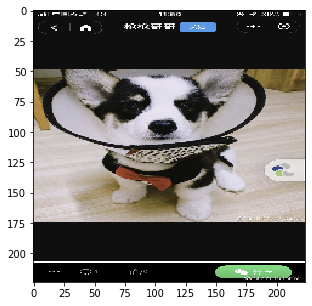

In [10]:
# visualize in data
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(5,5))
img=load_img(img_path,target_size=(224,224))
plt.imshow(img)

In [15]:
def modelProcess(img_path,model):
    img=load_img(img_path,target_size=(224,224))
    img=img_to_array(img)
    x=np.expand_dims(img,axis=0)
    x=preprocess_input(x)
    x_vgg=model.predict(x)
    x_vgg=x_vgg.reshape(1,25088)
    return x_vgg

import os
folder='./cats_and_dogs_filtered/train/cats'
dirs=os.listdir(folder)
img_path=[]
for i in dirs:
    if os.path.splitext(i)[1]=='.jpg':
        img_path.append(i)
img_path=[folder+"//"+i for i in img_path]

features1=np.zeros([len(img_path),25088])
for i in range(len(img_path)):
    feature_i=modelProcess(img_path[i],model_vgg)
    print('preprocessed:',img_path[i])
    features1[i]=feature_i

folder='./cats_and_dogs_filtered/train/dogs'
dirs=os.listdir(folder)
img_path=[]
for i in dirs:
    if os.path.splitext(i)[1]==".jpg":
        img_path.append(i)
img_path=[folder+"//"+i for i in img_path]
features2=np.zeros([len(img_path),25088])
for i in range(len(img_path)):
    feature_i=modelProcess(img_path[i],model_vgg)
    print('preprocessed:',img_path[i])
    features2[i]=feature_i
    
print(features1.shape,features2.shape)
y1=np.zeros(300)
y2=np.ones(300)
X=np.concatenate((features1,features2),axis=0)
y=np.concatenate((y1,y2),axis=0)
y=y.reshape(-1,1)
print(X.shape,y.shape)

preprocessed: ./cats_and_dogs_filtered/train/cats//cat.952.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.946.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.6.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.749.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.991.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.985.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.775.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.761.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.588.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.239.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.577.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.211.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.205.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.563.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.359.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.40

preprocessed: ./cats_and_dogs_filtered/train/cats//cat.571.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.217.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.559.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.388.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.377.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.411.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.405.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.363.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.439.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.808.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.834.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.820.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.613.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.175.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.161.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.

preprocessed: ./cats_and_dogs_filtered/train/cats//cat.138.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.47.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.892.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.662.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.104.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.110.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.676.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.111.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.677.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.663.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.105.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.46.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.893.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.887.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.139.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.52

preprocessed: ./cats_and_dogs_filtered/train/cats//cat.40.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.895.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.665.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.103.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.68.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.117.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.671.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.842.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.97.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.83.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.856.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.329.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.301.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.467.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.473.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.315.

preprocessed: ./cats_and_dogs_filtered/train/cats//cat.681.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.871.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.865.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.454.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.332.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.326.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.440.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.468.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.497.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.483.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.520.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.246.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.252.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.534.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.508.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.

preprocessed: ./cats_and_dogs_filtered/train/cats//cat.308.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.320.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.446.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.452.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.334.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.485.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.491.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.268.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.254.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.532.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.526.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.240.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.297.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.283.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.718.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.

preprocessed: ./cats_and_dogs_filtered/train/cats//cat.379.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.392.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.386.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.225.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.543.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.557.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.231.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.219.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.580.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.594.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.999.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.741.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.755.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.769.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.782.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.

preprocessed: ./cats_and_dogs_filtered/train/cats//cat.380.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.394.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.579.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.551.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.237.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.223.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.545.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.592.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.586.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.753.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.747.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.8.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.974.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.960.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.790.jpg
preprocessed: ./cats_and_dogs_filtered/train/cats//cat.94

preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.576.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.947.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.953.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.984.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.748.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.990.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.760.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.774.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.762.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.776.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.986.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.992.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.979.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.945.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.789.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.

preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.957.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.943.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.228.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.572.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.214.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.200.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.566.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.599.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.348.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.406.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.360.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.374.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.412.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.638.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.33.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.2

preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.339.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.488.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.113.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.675.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.661.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.107.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.649.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.891.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.2.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.42.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.56.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.885.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.81.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.852.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.846.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.95.jp

preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.78.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.673.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.840.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.698.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.93.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.87.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.854.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.868.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.869.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.855.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.86.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.92.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.699.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.841.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.114.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.672.j

preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.63.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.668.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.77.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.697.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.683.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.88.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.873.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.867.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.866.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.872.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.89.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.682.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.696.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.76.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.669.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.62.jp

preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.861.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.875.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.685.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.849.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.691.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.690.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.848.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.684.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.874.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.860.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.135.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.58.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.653.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.647.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.121.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.1

preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.838.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.810.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.804.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.805.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.811.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.187.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.839.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.193.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.178.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.15.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.144.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.29.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.622.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.636.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.150.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.38

preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.816.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.180.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.194.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.195.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.181.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.817.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.803.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.630.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.156.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.142.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.624.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.618.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.13.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.397.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.383.jpg
preprocessed: ./cats_and_dogs_filtered/train/dogs//dog.3

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=50)
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(units=10,activation='relu',input_dim=25088))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metric=['accuracy'])
model.fit(X_train,y_train,epochs=50)

ValueError: Found input variables with inconsistent numbers of samples: [2000, 600]

In [17]:
from sklearn.metrics import accuracy_score
y_train_predict=model.predict_classes(X_train)
accuracy_train=accuracy_score(y_train,y_train_predict)
print(accuracy_train)
y_test_predict=model.predict_classes(X_test)
accuracy_test=accuracy_score(y_test,y_test_predict)
print(accuracy_test)

NameError: name 'model' is not defined